<a href="https://colab.research.google.com/github/gabrielxbox/projeto-com-python/blob/master/20_cluster_no_camis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aprendizado nao supervisionado filme  utilizando pandas



In [1]:
pip install seaborn

In [2]:
import pandas as pd 

In [3]:
url_filmes ='/content/movies.csv';
filmes = pd.read_csv(url_filmes) 

#fazendo a mudança das coluna pa pr

filmes.columns = ['filme_id','titulo','generos']

filmes.head(5)


,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# pegando coluna expesificas e retornando um nam
generos = filmes.generos.str.get_dummies()

#mandando o data frame concatenar os filmes e gereros
#para manda o panda concatenar um do lado do outro 
dados_dos_filmes = pd.concat([filmes,generos], axis=1)

In [5]:
#importando sklearn para prepocessamento
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
# ele vai aprender os gereros e vai transfroma eles
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
#importanod o KMeans
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)

#mandando o modelo agrupar
modelo.fit(generos_escalados)

print(f'Grupo {modelo.labels_}')

Grupo [2 2 1 ... 1 2 1]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

# para trasforma linha em coluna 


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02  5.47364436e-01  1.05467362e-01 -2.35302765e-01
  -2.67640047e-01 -5.96350788e-01  4.44844050e-01 -2.15783659e-01
  -1.90714622e-01  3.45200112e-04  1.95003737e-01  6.80836696e-01
   1.21191845e-01 -1.76738311e-01  4.41067077e-01 -3.45968300e-01
   5.11130298e-01  1.15481555e+00 -1.47269115e-01 -6.11103430e-02]
 [ 3.76021657e-02 -2.56594542e-01 -1.95546499e-01 -2.52447789e-01
  -2.69785120e-01  2.47393158e-01 -1.60019080e-01  1.34956499e-01
   1.86133941e-01 -1.43796673e-01 -7.70819361e-02 -2.78195336e-01
  -1.05804411e-01  2.28492440e-02 -1.87200065e-01  2.08220842e-01
  -2.62440884e-01 -4.71322467e-01  9.80902333e-02  4.25275983e-02]
 [-5.91799474e-02 -1.73348396e-02  9.01388912e-01  2.253733

In [ ]:
#TSNE 
#augoritmo para redução de dados 
from sklearn.manifold import TSNE

tsne = TSNE()
# comverteu para 2 dimenção
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 33.101376 , -62.283764 ],
       [ 14.717352 , -64.53445  ],
       [-47.376225 ,  -2.6877801],
       ...,
       [ 16.964731 ,  -6.864022 ],
       [ 47.568626 ,  -6.524125 ],
       [ -4.714989 ,  26.022034 ]], dtype=float32)

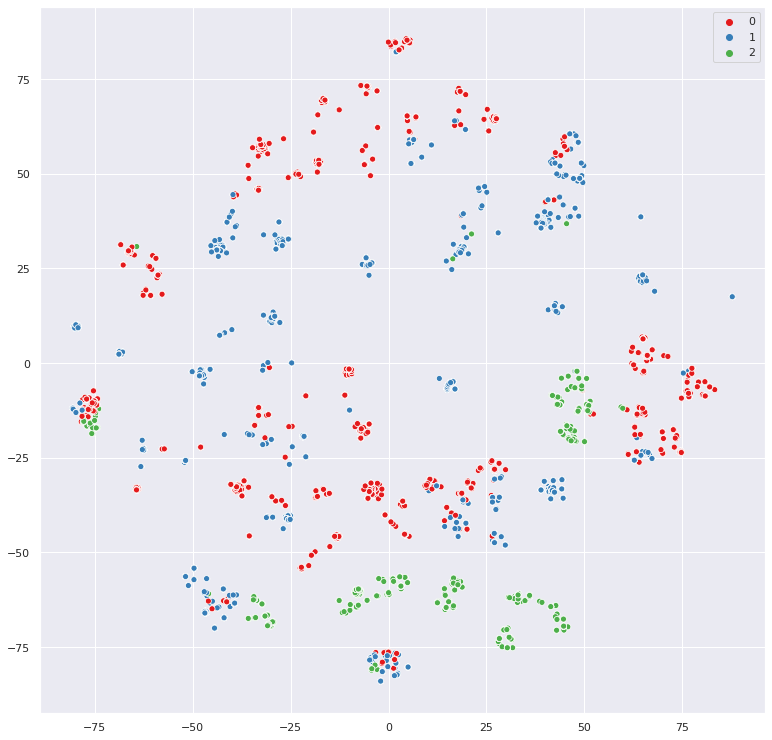

In [ ]:
#bibioteca de grafico seaborn
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefadda8ba8>,
      dtype=object)

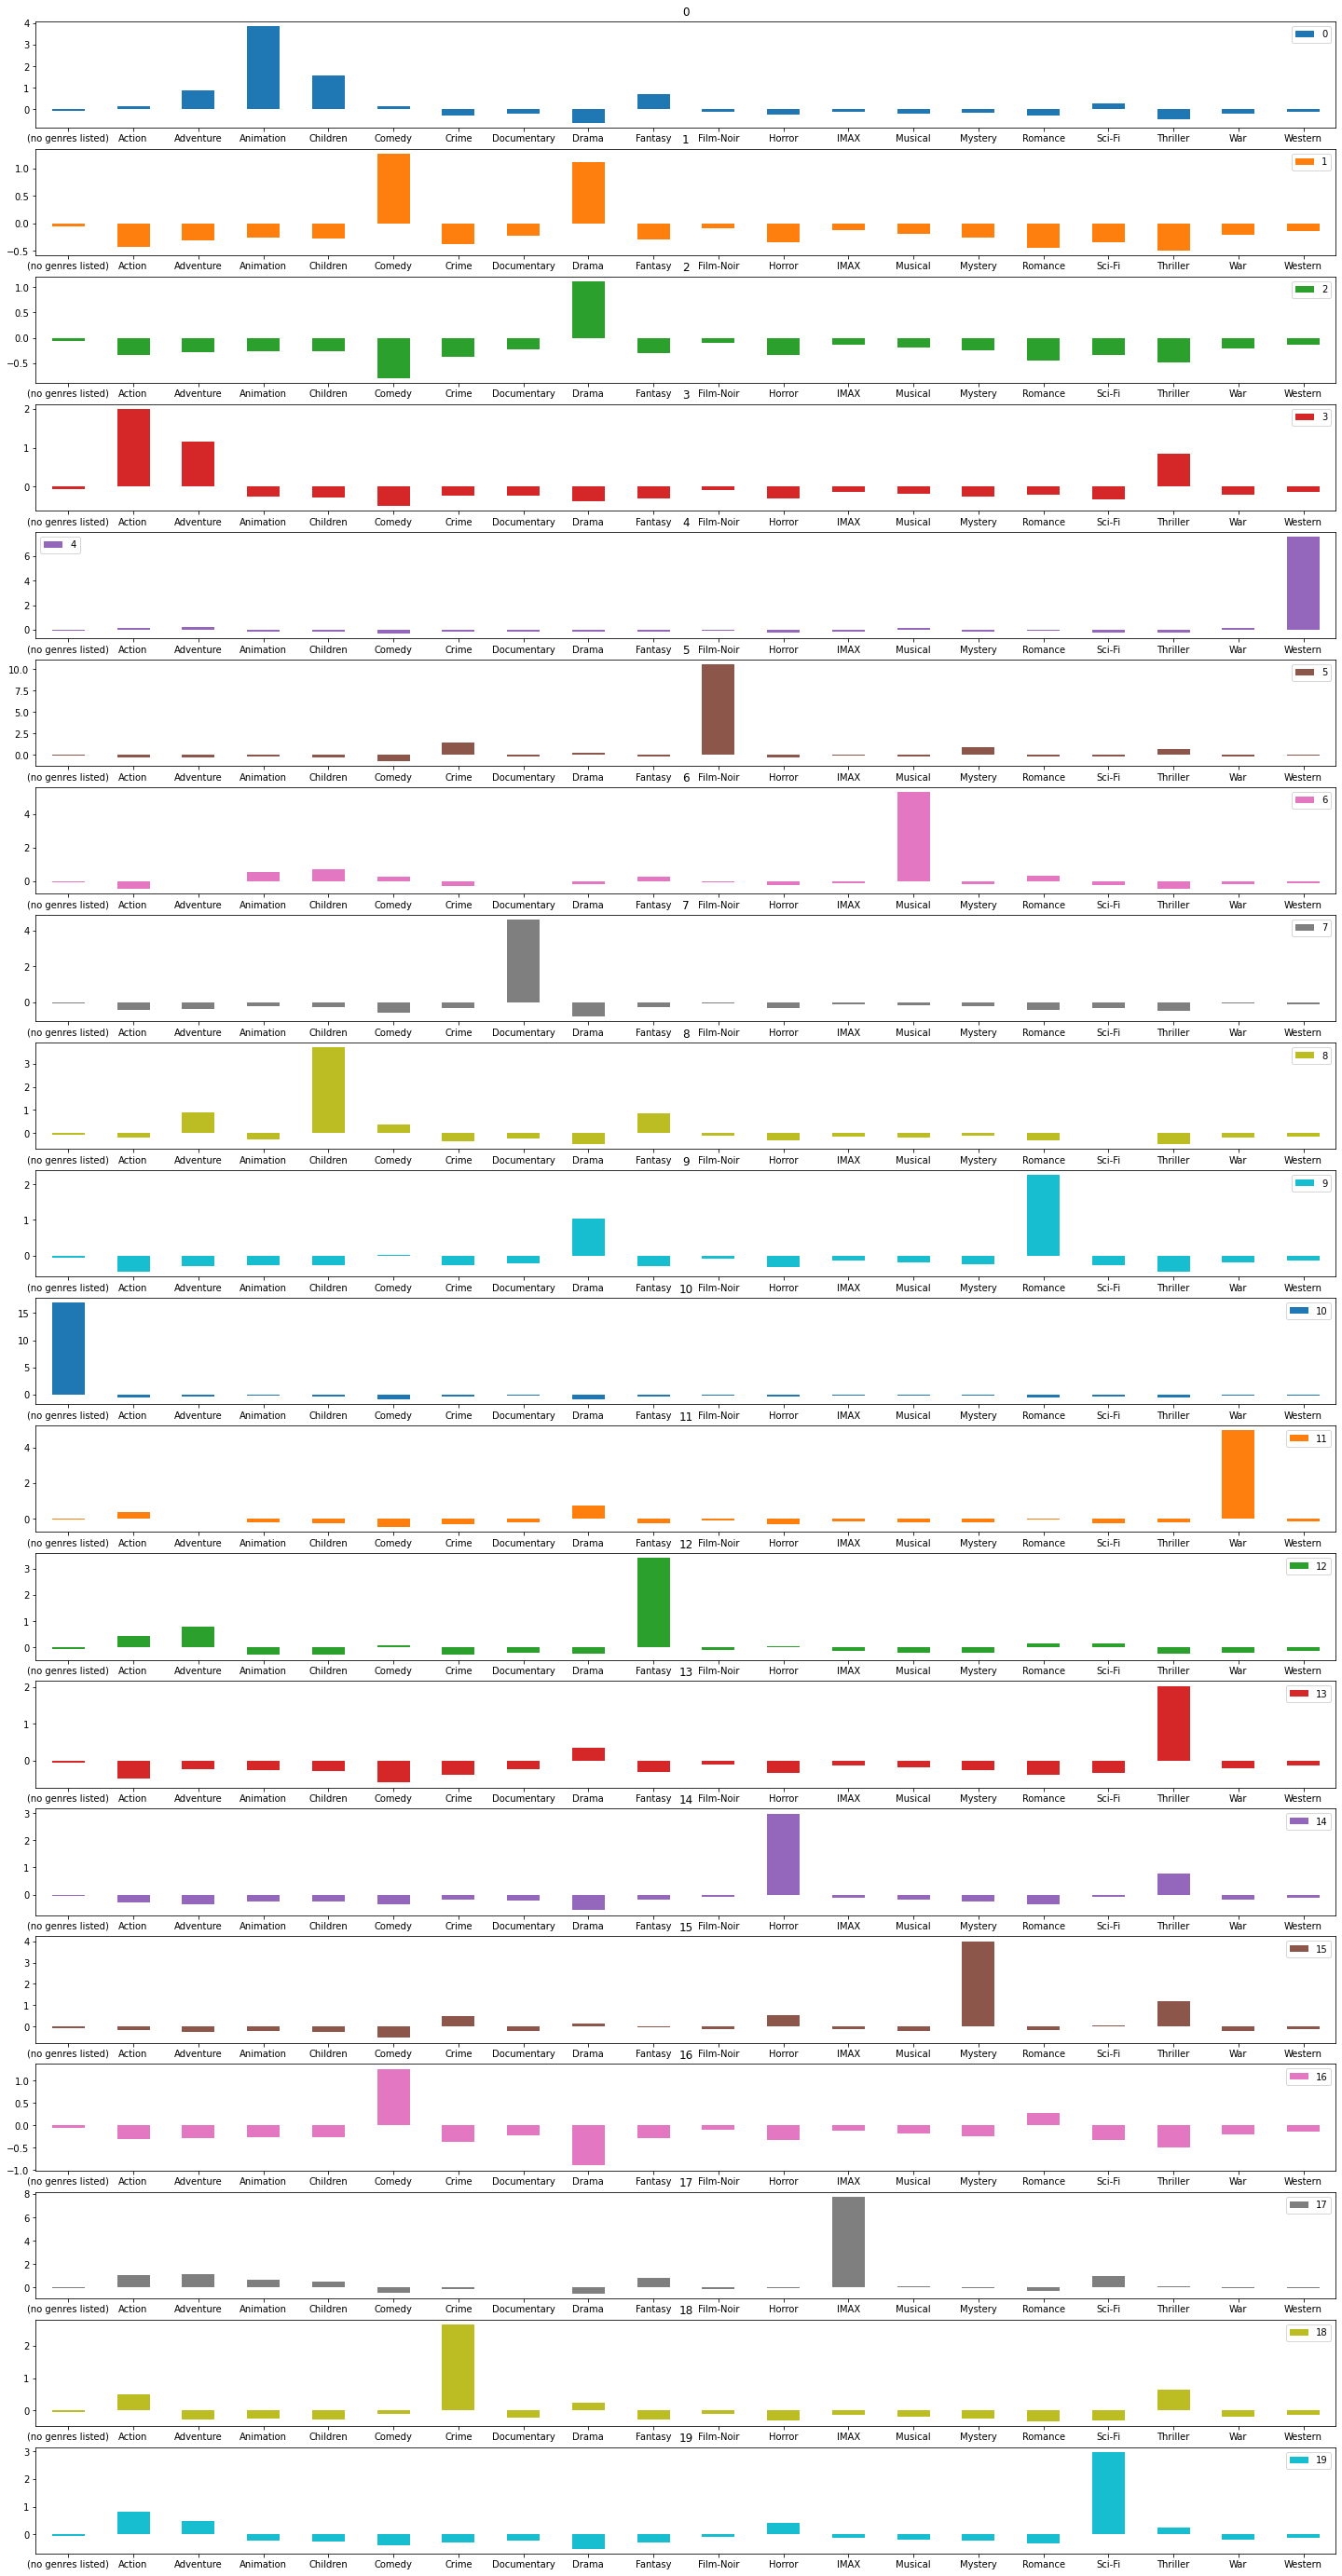

In [12]:
# pasando os 20 cluster no camis 

#importanod o KMeans
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 20)

#mandando o modelo agrupar
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [13]:
grupo = 2

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9225,152085,Desierto (2016),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4624,6887,Radio (2003),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6233,46322,Jet Li's Fearless (Huo Yuan Jia) (2006),Action|Drama,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3519,4810,I Never Promised You a Rose Garden (1977),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3611,4959,"Affair of the Necklace, The (2001)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9298,158874,Karate Bullfighter (1975),Action|Drama,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5935,34148,"Beat That My Heart Skipped, The (battre mon co...",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8628,118896,Mommy (2014),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1738,2333,Gods and Monsters (1998),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
def Kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [16]:
Kmeans(20, generos_escalados)

[20, 56212.99848446531]

In [17]:
resultado = [Kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado


[[1, 194840.0],
 [2, 179909.54996425138],
 [3, 168285.90749795968],
 [4, 156739.81815025274],
 [5, 147777.45773581503],
 [6, 137683.2280752665],
 [7, 129945.3029480451],
 [8, 119629.30683737766],
 [9, 111154.19115625696],
 [10, 102188.6084794605],
 [11, 93395.14457965309],
 [12, 86319.4892638537],
 [13, 82057.86399960137],
 [14, 73847.38749653517],
 [15, 67970.06404676],
 [16, 65094.13356947358],
 [17, 63271.37107863345],
 [18, 60237.01677358453],
 [19, 56631.77909642529],
 [20, 55290.051480076305],
 [21, 52880.97228999392],
 [22, 52371.56216394208],
 [23, 50334.84393439797],
 [24, 49795.04374899563],
 [25, 47978.875437472],
 [26, 46475.259970207975],
 [27, 46113.292228404716],
 [28, 44779.31016603783],
 [29, 43700.48196853244],
 [30, 42488.48322778251],
 [31, 41827.89741013602],
 [32, 41322.6629854902],
 [33, 40169.89115900289],
 [34, 39046.490261548744],
 [35, 38598.38509355695],
 [36, 37788.83922029048],
 [37, 37194.00686936444],
 [38, 37110.50677147735],
 [39, 35801.44425767126],
 

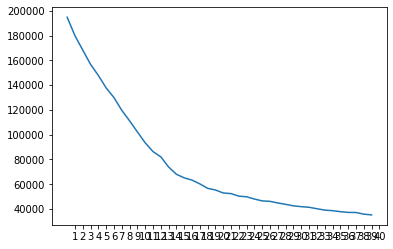

In [21]:
resultado = pd.DataFrame(resultado,
             columns=['grupos','inertia'])

resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefacfc2ac8>,
      dtype=object)

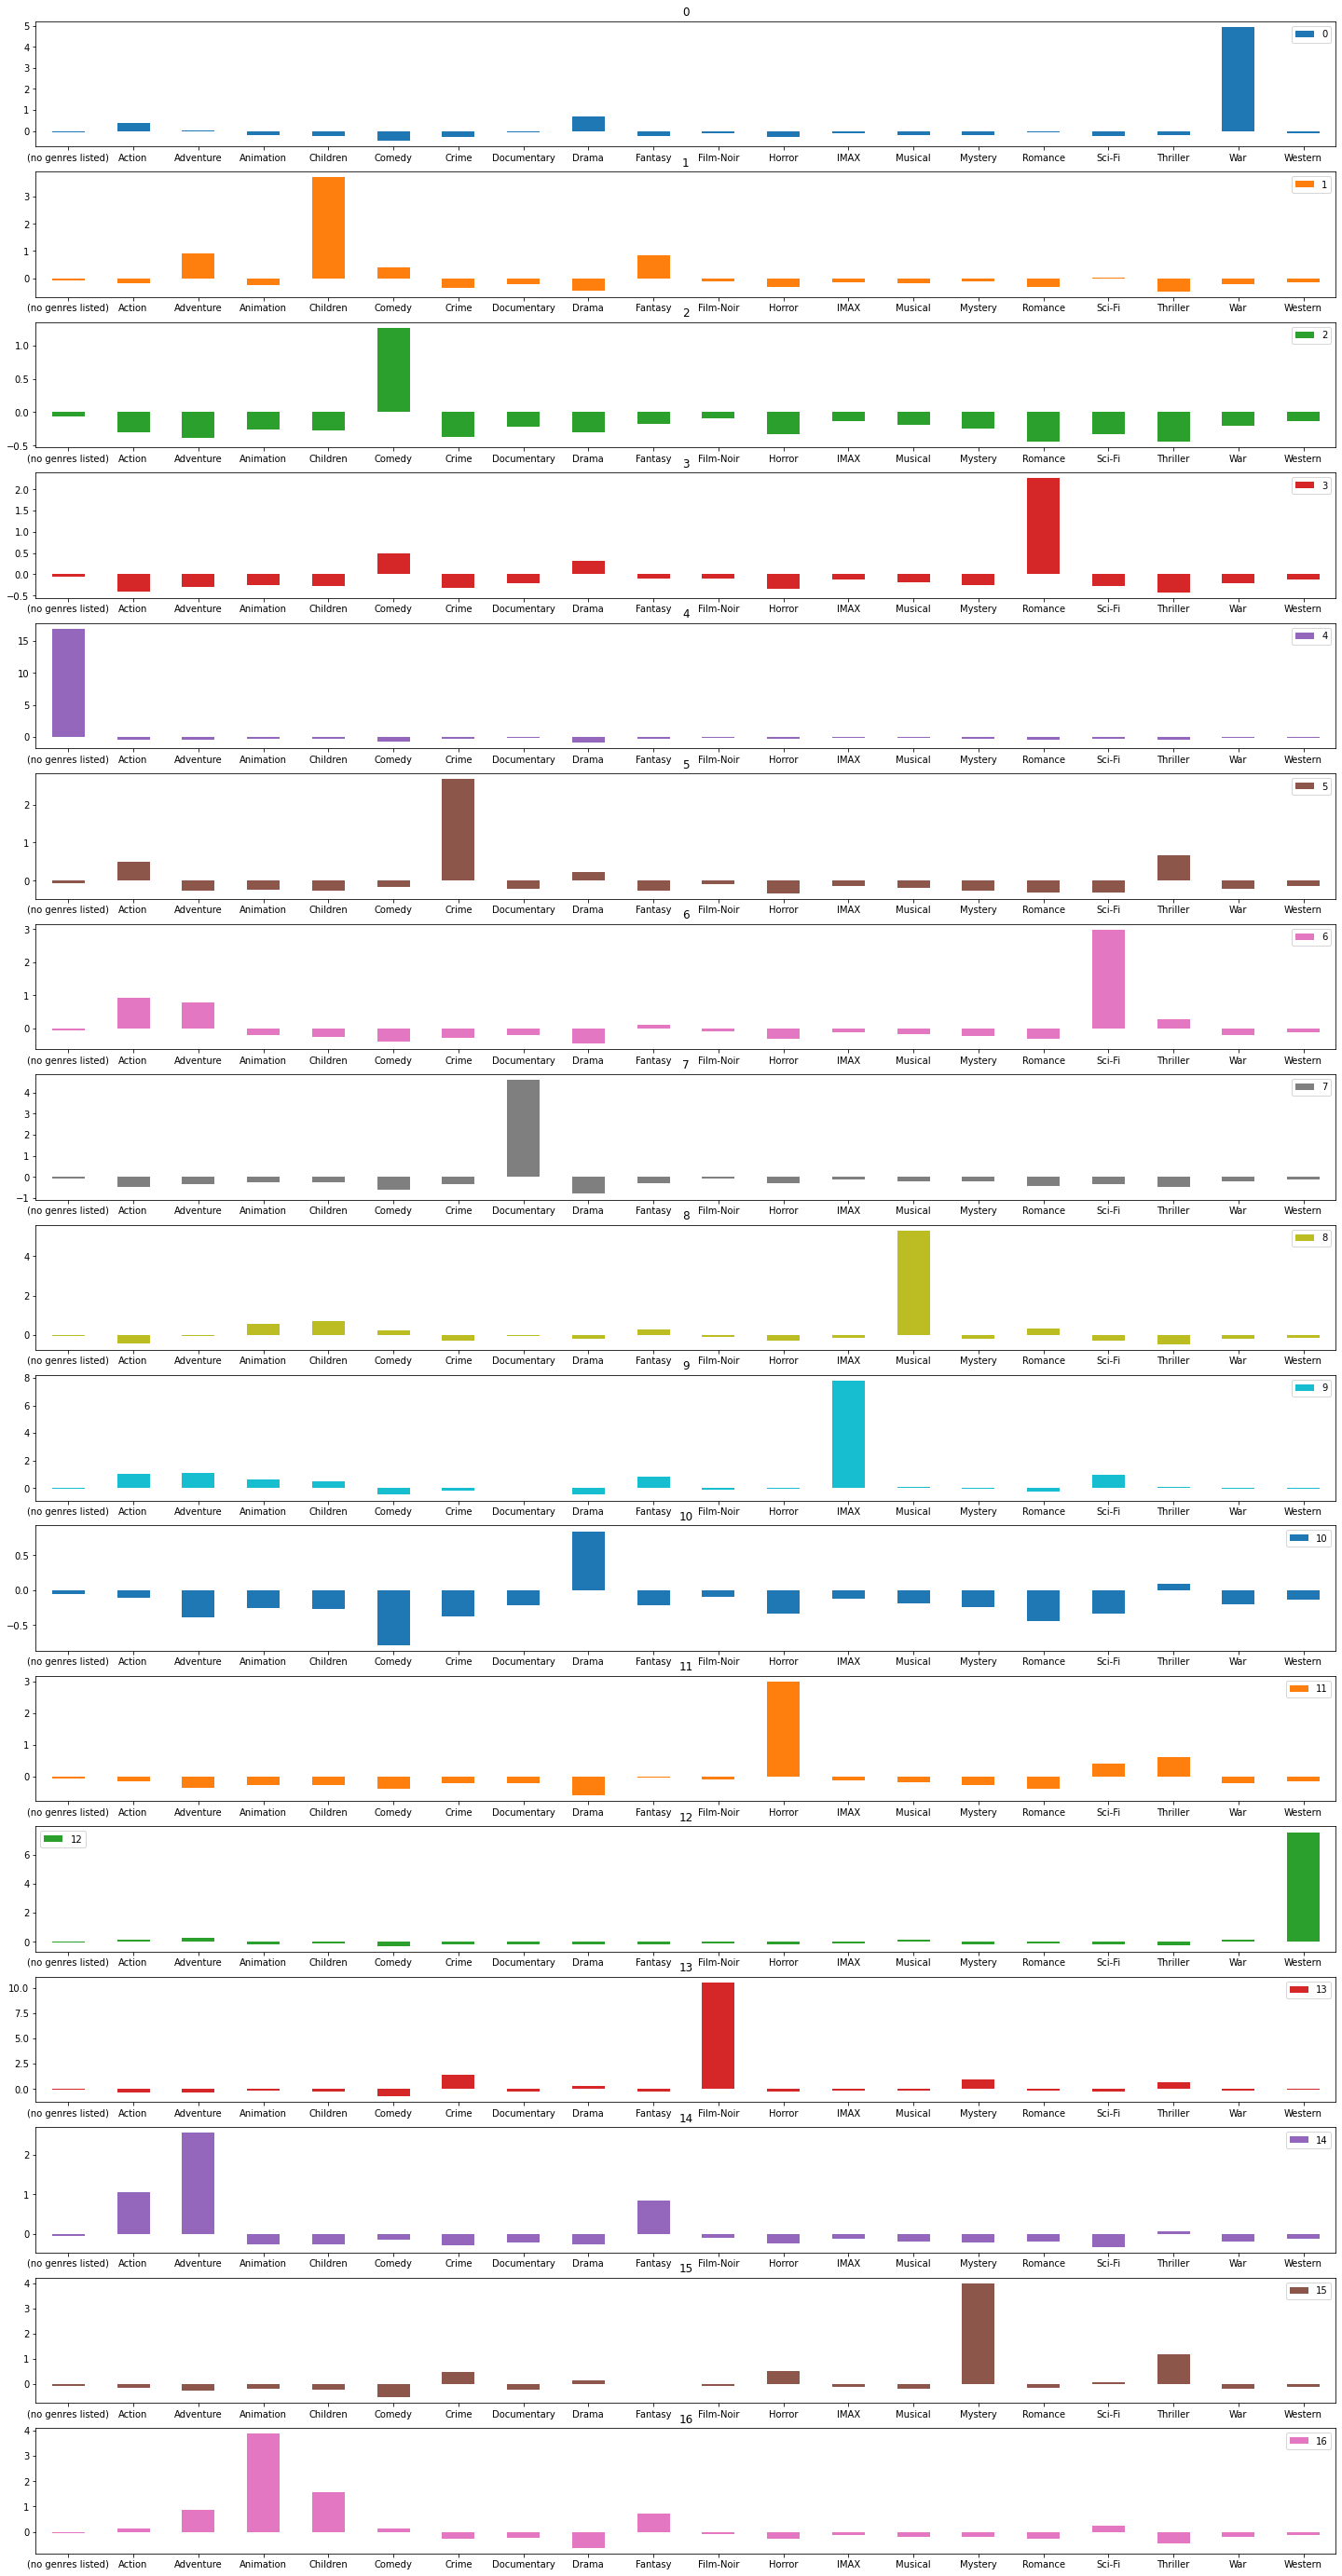

In [23]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)



